## Filtering the feature [used in every project]

- constant removal technique VAR =0
- quasi contant removal technique VAR =0.1
- duplicate removal technique

In [1]:
import sklearn

In [2]:
print(sklearn.__version__)

1.0.2


### constant removal

# removing the column which has variance completely zero

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('./dataset_1.csv')

In [5]:
df.head(10)

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_292,var_293,var_294,var_295,var_296,var_297,var_298,var_299,var_300,target
0,0,0,0.0,0.00,0.0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0.0,0.0000,0
1,0,0,0.0,3.00,0.0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0.0,0.0000,0
2,0,0,0.0,5.88,0.0,0,0,0,0,0,...,0.0,0,0,3,0,0,0,0.0,67772.7216,0
3,0,0,0.0,14.10,0.0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0.0,0.0000,0
4,0,0,0.0,5.76,0.0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0.0,0.0000,0
5,0,0,0.0,8.46,0.0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0.0,0.0000,0
6,0,0,0.0,8.82,0.0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0.0,0.0000,0
7,0,0,0.0,5.94,0.0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0.0,0.0000,0
8,0,0,0.0,2.97,0.0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0.0,0.0000,1
9,0,0,0.0,0.00,0.0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0.0,0.0000,0


In [6]:
df.shape

(50000, 301)

In [7]:
df.isnull().sum()

var_1      0
var_2      0
var_3      0
var_4      0
var_5      0
          ..
var_297    0
var_298    0
var_299    0
var_300    0
target     0
Length: 301, dtype: int64

In [8]:
for i in df.columns:
    print('Number of null values in ',i,df[i].isnull().sum())

Number of null values in  var_1 0
Number of null values in  var_2 0
Number of null values in  var_3 0
Number of null values in  var_4 0
Number of null values in  var_5 0
Number of null values in  var_6 0
Number of null values in  var_7 0
Number of null values in  var_8 0
Number of null values in  var_9 0
Number of null values in  var_10 0
Number of null values in  var_11 0
Number of null values in  var_12 0
Number of null values in  var_13 0
Number of null values in  var_14 0
Number of null values in  var_15 0
Number of null values in  var_16 0
Number of null values in  var_17 0
Number of null values in  var_18 0
Number of null values in  var_19 0
Number of null values in  var_20 0
Number of null values in  var_21 0
Number of null values in  var_22 0
Number of null values in  var_23 0
Number of null values in  var_24 0
Number of null values in  var_25 0
Number of null values in  var_26 0
Number of null values in  var_27 0
Number of null values in  var_28 0
Number of null values in  var

In [9]:
from sklearn.feature_selection import VarianceThreshold  ## cheking the variace

In [10]:
var = VarianceThreshold(threshold=0.0) ## variance = 0

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
df_inde = df.iloc[: ,:-1]

In [13]:
var.fit(df_inde)

VarianceThreshold()

In [14]:
var.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True,  True,  True,  True,  True, False,  True, False,  True,
        True, False,  True,  True,  True,  True, False,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False,  True,  True,  True,  True,
        True,  True, False,  True, False,  True,  True,  True,  True,
       False,  True,

In [15]:
sum(var.get_support())  ## 267  columns are important which means variance is not zero

267

In [16]:
a = df_inde.columns[var.get_support()]

In [17]:
## just checking
df_inde['var_1'].var()

0.011695305506113498

In [18]:
constant = df_inde.columns[~var.get_support()]

In [19]:
constant

Index(['var_23', 'var_33', 'var_44', 'var_61', 'var_80', 'var_81', 'var_87',
       'var_89', 'var_92', 'var_97', 'var_99', 'var_112', 'var_113', 'var_120',
       'var_122', 'var_127', 'var_135', 'var_158', 'var_167', 'var_171',
       'var_178', 'var_180', 'var_182', 'var_195', 'var_196', 'var_201',
       'var_212', 'var_215', 'var_225', 'var_227', 'var_248', 'var_294',
       'var_297'],
      dtype='object')

In [20]:
len(constant)

33

In [21]:
df_inde = var.transform(df_inde)

In [22]:
df_inde.shape

(50000, 267)

In [23]:
df_inde = pd.DataFrame(data = df_inde, columns =a)

In [24]:
df_inde['target'] = df['target']

In [25]:
df_inde.shape

(50000, 268)

In [26]:
df['var_212'].var()

0.0

In [27]:
df['var_212'].unique()

array([0], dtype=int64)

## Quasi constant method var = 0.1

In [28]:
from sklearn.feature_selection import VarianceThreshold  ## cheking the variace

In [29]:
var = VarianceThreshold(threshold = 0.1) ## variance = 0

In [30]:
df_inde = df_inde.iloc[:, :-1]

In [31]:
var.fit(df_inde)

VarianceThreshold(threshold=0.1)

In [32]:
var.get_support()

array([False, False,  True,  True,  True,  True, False,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False, False,  True,  True, False,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True, False, False, False,  True, False,  True,
        True, False,  True,  True, False,  True,  True, False, False,
       False, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True, False,
        True,  True,  True, False, False,  True,  True,  True,  True,
        True, False, False,  True, False,  True,  True,  True,  True,
        True, False,  True, False, False,  True,  True, False, False,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True, False,  True,  True,  True, False,  True,  True,
        True,  True,

In [33]:
sum(var.get_support()) ## 174 columns are important which means variance is not zero

174

In [34]:
a = df_inde.columns[var.get_support()]
a

Index(['var_3', 'var_4', 'var_5', 'var_6', 'var_8', 'var_11', 'var_12',
       'var_13', 'var_14', 'var_15',
       ...
       'var_280', 'var_283', 'var_286', 'var_288', 'var_290', 'var_292',
       'var_295', 'var_296', 'var_299', 'var_300'],
      dtype='object', length=174)

In [35]:
## just cheking 
df_inde['var_3'].var()

1639864.2748740753

In [36]:
267 -174 ## 93 columns not important

93

In [37]:
constant = df_inde.columns[~var.get_support()]

In [38]:
constant

Index(['var_1', 'var_2', 'var_7', 'var_9', 'var_10', 'var_19', 'var_24',
       'var_25', 'var_28', 'var_36', 'var_43', 'var_45', 'var_52', 'var_53',
       'var_54', 'var_56', 'var_59', 'var_63', 'var_66', 'var_67', 'var_68',
       'var_69', 'var_70', 'var_71', 'var_83', 'var_84', 'var_88', 'var_94',
       'var_95', 'var_103', 'var_104', 'var_106', 'var_114', 'var_116',
       'var_117', 'var_121', 'var_123', 'var_133', 'var_137', 'var_141',
       'var_146', 'var_159', 'var_162', 'var_164', 'var_168', 'var_170',
       'var_177', 'var_187', 'var_189', 'var_194', 'var_197', 'var_198',
       'var_199', 'var_202', 'var_206', 'var_211', 'var_218', 'var_219',
       'var_223', 'var_224', 'var_226', 'var_229', 'var_232', 'var_233',
       'var_234', 'var_235', 'var_236', 'var_238', 'var_241', 'var_245',
       'var_247', 'var_249', 'var_250', 'var_251', 'var_252', 'var_256',
       'var_260', 'var_267', 'var_269', 'var_270', 'var_273', 'var_274',
       'var_275', 'var_278', 'var_281', 

In [39]:
df_inde['var_1'].var()> 0.1

False

In [40]:
len(constant)

93

In [41]:
df_inde = var.transform(df_inde)

In [42]:
df_inde.shape

(50000, 174)

In [43]:
df_inde = pd.DataFrame(data = df_inde, columns= a)

In [44]:
df_inde

,var_3,var_4,var_5,var_6,var_8,var_11,var_12,var_13,var_14,var_15,...,var_280,var_283,var_286,var_288,var_290,var_292,var_295,var_296,var_299,var_300
0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0000
1,0.0,3.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0000
2,0.0,5.88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.00,3.0,0.0,0.0,67772.7216
3,0.0,14.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0000
4,0.0,5.76,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.0,2.85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0000
49996,0.0,2.91,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0000
49997,0.0,8.46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0000
49998,0.0,2.76,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0000


In [45]:
df_inde['target'] = df ['target']

In [46]:
df_inde.shape

(50000, 175)

In [47]:
df_inde.head()

,var_3,var_4,var_5,var_6,var_8,var_11,var_12,var_13,var_14,var_15,...,var_283,var_286,var_288,var_290,var_292,var_295,var_296,var_299,var_300,target
0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0
1,0.0,3.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0
2,0.0,5.88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,67772.7216,0
3,0.0,14.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0
4,0.0,5.76,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0


## duplicate removals

-- feature - engine framework

In [48]:
!pip install feature-engine

In [49]:
import feature_engine

In [50]:
from feature_engine.selection import DropDuplicateFeatures

In [51]:
reg = DropDuplicateFeatures()

In [52]:
reg.fit(df_inde)

DropDuplicateFeatures()

In [53]:
reg.features_to_drop_

{'var_148', 'var_151', 'var_183', 'var_216', 'var_239', 'var_263', 'var_296'}

In [54]:
df_inde['var_148'] == df_inde['var_148']

0        True
1        True
2        True
3        True
4        True
         ... 
49995    True
49996    True
49997    True
49998    True
49999    True
Name: var_148, Length: 50000, dtype: bool

In [55]:
df_inde = reg.transform(df_inde)

In [56]:
df_inde.head(10)

,var_3,var_4,var_5,var_6,var_8,var_11,var_12,var_13,var_14,var_15,...,var_280,var_283,var_286,var_288,var_290,var_292,var_295,var_299,var_300,target
0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0
1,0.0,3.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0
2,0.0,5.88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,67772.7216,0
3,0.0,14.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0
4,0.0,5.76,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0
5,0.0,8.46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0
6,0.0,8.82,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0
7,0.0,5.94,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0
8,0.0,2.97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,1
9,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0


300 --> 267 --> 174 --.167

In [57]:
from feature_engine.selection import DropCorrelatedFeatures

In [58]:
reg = DropCorrelatedFeatures(threshold=0.85, method='pearson')

In [59]:
reg.fit(df_inde)

DropCorrelatedFeatures(threshold=0.85)

In [60]:
reg.features_to_drop_

{'var_100',
 'var_101',
 'var_105',
 'var_107',
 'var_125',
 'var_129',
 'var_130',
 'var_132',
 'var_139',
 'var_14',
 'var_140',
 'var_143',
 'var_145',
 'var_153',
 'var_155',
 'var_161',
 'var_163',
 'var_165',
 'var_166',
 'var_172',
 'var_175',
 'var_176',
 'var_179',
 'var_186',
 'var_190',
 'var_191',
 'var_192',
 'var_203',
 'var_207',
 'var_210',
 'var_213',
 'var_214',
 'var_217',
 'var_222',
 'var_230',
 'var_237',
 'var_244',
 'var_253',
 'var_254',
 'var_255',
 'var_257',
 'var_259',
 'var_261',
 'var_262',
 'var_272',
 'var_277',
 'var_279',
 'var_280',
 'var_283',
 'var_286',
 'var_290',
 'var_295',
 'var_299',
 'var_300',
 'var_40',
 'var_62',
 'var_64',
 'var_73',
 'var_86'}

In [61]:
df_inde = reg.transform(df_inde)

In [62]:
df_inde.head(10)

,var_3,var_4,var_5,var_6,var_8,var_11,var_12,var_13,var_15,var_16,...,var_258,var_264,var_265,var_266,var_268,var_271,var_276,var_288,var_292,target
0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0
1,0.0,3.00,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0
2,0.0,5.88,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0
3,0.0,14.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,450.4200,90.8868,0.0,0.0,0.0,0.0,0
4,0.0,5.76,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0
5,0.0,8.46,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0
6,0.0,8.82,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,24.6078,0.0000,0.0,0.0,0.0,0.0,0
7,0.0,5.94,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,176.9313,0.0000,0.0,0.0,0.0,0.0,0
8,0.0,2.97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,1
9,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0


300 --> 267-->174--> 168--> correlation -->108

## mutual information gain technique

--mutual information gain uses dependent variable to select the best features

In [63]:
df_inde['target'].unique()

array([0, 1], dtype=int64)

In [64]:
from sklearn.feature_selection import mutual_info_classif,mutual_info_regression

In [65]:
x = df.iloc[:, :-1] # independent
y = df.iloc[:, -1] ## dependent

In [66]:
reg = mutual_info_classif(x,y)

In [67]:
reg

array([0.00000000e+00, 4.92061690e-04, 8.17949404e-04, 1.01529576e-02,
       6.27822059e-04, 0.00000000e+00, 7.26593088e-04, 9.12286109e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.54905070e-02, 0.00000000e+00,
       6.93982195e-04, 1.56069974e-04, 1.06802048e-03, 0.00000000e+00,
       1.10730836e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.46002361e-04, 9.24439210e-04, 1.56948962e-03,
       2.74127052e-03, 9.76509929e-04, 9.04744072e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.30872920e-02, 0.00000000e+00,
       5.83337330e-04, 1.83842537e-03, 0.00000000e+00, 0.00000000e+00,
       1.33695126e-04, 6.87931497e-04, 0.00000000e+00, 8.17780980e-04,
       0.00000000e+00, 2.13344224e-03, 3.36742476e-04, 1.84754072e-04,
       1.04405356e-02, 0.00000000e+00, 5.11538754e-04, 1.53037948e-03,
       0.00000000e+00, 0.00000000e+00, 1.13683290e-02, 1.13390471e-03,
      

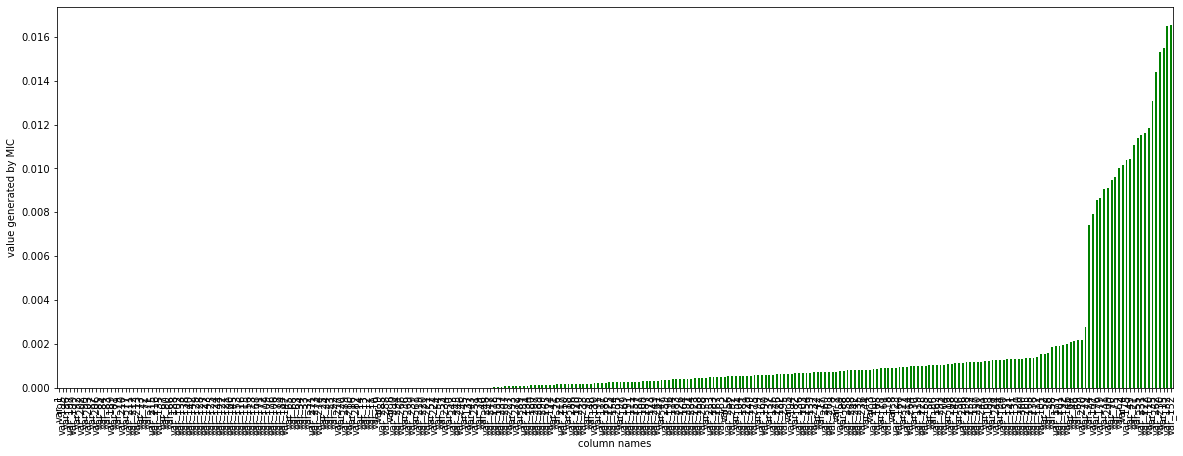

In [68]:
sol = pd.Series(reg)
sol.index = x.columns
sol.sort_values(ascending = True).plot.bar(color = 'g', figsize=(20,7) )
plt.xlabel('column names')
plt.ylabel('value generated by MIC')
plt.show()


In [69]:
## using select best algorithms

In [70]:
from sklearn.feature_selection import SelectKBest

In [71]:
sel = SelectKBest(mutual_info_classif,k=50).fit(x,y)

-There should be no null values

In [72]:
sel.get_support()

array([False, False, False,  True,  True, False, False, False,  True,
       False, False, False, False, False,  True, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False,  True,  True,  True, False, False, False,  True, False,
       False, False, False, False, False, False, False,  True, False,
        True, False, False,  True, False, False,  True, False, False,
        True, False, False,  True, False, False, False,  True, False,
        True, False, False, False, False, False,  True, False, False,
       False,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True,  True,  True, False,  True, False, False, False,
        True, False, False, False, False, False, False, False,  True,
       False, False,

In [73]:
x.columns[sel.get_support()]

Index(['var_4', 'var_5', 'var_9', 'var_15', 'var_18', 'var_21', 'var_29',
       'var_30', 'var_31', 'var_35', 'var_44', 'var_46', 'var_49', 'var_52',
       'var_55', 'var_58', 'var_62', 'var_64', 'var_70', 'var_74', 'var_75',
       'var_76', 'var_91', 'var_107', 'var_110', 'var_111', 'var_112',
       'var_114', 'var_118', 'var_126', 'var_132', 'var_134', 'var_146',
       'var_152', 'var_160', 'var_161', 'var_163', 'var_170', 'var_175',
       'var_178', 'var_179', 'var_205', 'var_209', 'var_219', 'var_222',
       'var_230', 'var_231', 'var_259', 'var_262', 'var_284'],
      dtype='object')

In [74]:
a = x.columns[sel.get_support()]

In [75]:
df_inde = sel.transform(x)

In [76]:
df_inde = pd.DataFrame(data = df_inde, columns=a)

In [77]:
df_inde.head()

,var_4,var_5,var_9,var_15,var_18,var_21,var_29,var_30,var_31,var_35,...,var_179,var_205,var_209,var_219,var_222,var_230,var_231,var_259,var_262,var_284
0,0.00,0.0,0.0,0.0,0.00,0.0000,1.98,0.0000,3.0,0.0000,...,1.0,0.0000,3.0,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0
1,3.00,0.0,0.0,3.0,0.00,2.7300,1.92,0.0000,0.0,2.9100,...,0.0,0.0000,3.0,0.0,2.7600,3.0,2.4990,0.0,1.0,0.0
2,5.88,0.0,0.0,3.0,0.00,19.8990,1.94,69867.6741,3.0,71397.5526,...,1.0,0.0000,3.0,0.0,71397.5526,6.0,48492.8784,3.0,2.0,1.0
3,14.10,0.0,0.0,0.0,988.47,0.0000,7.44,0.0000,6.0,19.0164,...,1.0,723.7575,0.0,0.0,19.2231,3.0,0.0000,0.0,4.0,0.0
4,5.76,0.0,0.0,3.0,0.00,5981.1741,1.94,0.0000,3.0,6285.6000,...,1.0,0.0000,3.0,0.0,5958.2250,3.0,1949.4783,0.0,2.0,0.0


In [78]:
df_inde['target'] = df['target']

In [79]:
df_inde.head()

,var_4,var_5,var_9,var_15,var_18,var_21,var_29,var_30,var_31,var_35,...,var_205,var_209,var_219,var_222,var_230,var_231,var_259,var_262,var_284,target
0,0.00,0.0,0.0,0.0,0.00,0.0000,1.98,0.0000,3.0,0.0000,...,0.0000,3.0,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0
1,3.00,0.0,0.0,3.0,0.00,2.7300,1.92,0.0000,0.0,2.9100,...,0.0000,3.0,0.0,2.7600,3.0,2.4990,0.0,1.0,0.0,0
2,5.88,0.0,0.0,3.0,0.00,19.8990,1.94,69867.6741,3.0,71397.5526,...,0.0000,3.0,0.0,71397.5526,6.0,48492.8784,3.0,2.0,1.0,0
3,14.10,0.0,0.0,0.0,988.47,0.0000,7.44,0.0000,6.0,19.0164,...,723.7575,0.0,0.0,19.2231,3.0,0.0000,0.0,4.0,0.0,0
4,5.76,0.0,0.0,3.0,0.00,5981.1741,1.94,0.0000,3.0,6285.6000,...,0.0000,3.0,0.0,5958.2250,3.0,1949.4783,0.0,2.0,0.0,0


300 --> 267 -->174 --> 167--> 108--> 50

--Lasso Regression

In [80]:
from sklearn.linear_model import Lasso , LogisticRegression

In [81]:
from sklearn.feature_selection import SelectFromModel

- Lasso formula = cost function + lambda * |slope| --> slope values has
chance to each close to zero ,the features which moves to completely zero
then we can remove that colunm
-cost function = mse, RMSE , ARMSE


In [82]:
sc = SelectFromModel(LogisticRegression(C = 0.5,penalty ='l1',solver ='liblinear',random_state=42))

In [83]:
x = df_inde.iloc[:, :-1]
y = df_inde.iloc[:, -1]

In [84]:
sc.fit(x, y)

SelectFromModel(estimator=LogisticRegression(C=0.5, penalty='l1',
                                             random_state=42,
                                             solver='liblinear'))

In [85]:
sc.get_support ()

array([ True, False, False,  True,  True,  True, False, False,  True,
        True, False, False,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True, False, False,  True,  True,  True, False,
        True,  True,  True,  True,  True])

In [86]:
a = x.columns[sc.get_support()]

In [87]:
a

Index(['var_4', 'var_15', 'var_18', 'var_21', 'var_31', 'var_35', 'var_49',
       'var_55', 'var_58', 'var_62', 'var_64', 'var_70', 'var_74', 'var_75',
       'var_76', 'var_91', 'var_107', 'var_110', 'var_114', 'var_118',
       'var_126', 'var_132', 'var_134', 'var_146', 'var_152', 'var_160',
       'var_161', 'var_175', 'var_205', 'var_209', 'var_219', 'var_230',
       'var_231', 'var_259', 'var_262', 'var_284'],
      dtype='object')

In [88]:
len(a)

36

In [89]:
df_inde= sc.transform(x)

In [90]:
df_inde.shape

(50000, 36)

In [91]:
df_inde = pd.DataFrame(data = df_inde, columns= a)

In [92]:
df_inde.head()

,var_4,var_15,var_18,var_21,var_31,var_35,var_49,var_55,var_58,var_62,...,var_161,var_175,var_205,var_209,var_219,var_230,var_231,var_259,var_262,var_284
0,0.00,0.0,0.00,0.0000,3.0,0.0000,99.0,0.0000,0.0,3.0,...,0.00,1.0,0.0000,3.0,0.0,0.0,0.0000,0.0,0.0,0.0
1,3.00,3.0,0.00,2.7300,0.0,2.9100,2.0,2.6226,0.0,0.0,...,0.00,0.0,0.0000,3.0,0.0,3.0,2.4990,0.0,1.0,0.0
2,5.88,3.0,0.00,19.8990,3.0,71397.5526,2.0,22874.0550,3.0,3.0,...,2.82,1.0,0.0000,3.0,0.0,6.0,48492.8784,3.0,2.0,1.0
3,14.10,0.0,988.47,0.0000,6.0,19.0164,2.0,0.0000,0.0,6.0,...,5.52,1.0,723.7575,0.0,0.0,3.0,0.0000,0.0,4.0,0.0
4,5.76,3.0,0.00,5981.1741,3.0,6285.6000,1.0,4074.2619,0.0,3.0,...,0.00,1.0,0.0000,3.0,0.0,3.0,1949.4783,0.0,2.0,0.0


In [93]:
df_inde['target'] =df['target']

In [94]:
df_inde.head()

,var_4,var_15,var_18,var_21,var_31,var_35,var_49,var_55,var_58,var_62,...,var_175,var_205,var_209,var_219,var_230,var_231,var_259,var_262,var_284,target
0,0.00,0.0,0.00,0.0000,3.0,0.0000,99.0,0.0000,0.0,3.0,...,1.0,0.0000,3.0,0.0,0.0,0.0000,0.0,0.0,0.0,0
1,3.00,3.0,0.00,2.7300,0.0,2.9100,2.0,2.6226,0.0,0.0,...,0.0,0.0000,3.0,0.0,3.0,2.4990,0.0,1.0,0.0,0
2,5.88,3.0,0.00,19.8990,3.0,71397.5526,2.0,22874.0550,3.0,3.0,...,1.0,0.0000,3.0,0.0,6.0,48492.8784,3.0,2.0,1.0,0
3,14.10,0.0,988.47,0.0000,6.0,19.0164,2.0,0.0000,0.0,6.0,...,1.0,723.7575,0.0,0.0,3.0,0.0000,0.0,4.0,0.0,0
4,5.76,3.0,0.00,5981.1741,3.0,6285.6000,1.0,4074.2619,0.0,3.0,...,1.0,0.0000,3.0,0.0,3.0,1949.4783,0.0,2.0,0.0,0


In [95]:
df_inde.shape

(50000, 37)

## random forest for feature selection

In [96]:
from sklearn.ensemble import RandomForestClassifier

In [97]:
x =df_inde.iloc[: ,:-1]
y= df_inde.iloc[:, -1]

In [98]:
sc = SelectFromModel(RandomForestClassifier(n_estimators = 10, random_state=42))
sc.fit(x,y)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=10,
                                                 random_state=42))

In [99]:
sc.get_support()

array([ True, False, False,  True, False,  True, False,  True, False,
       False, False, False, False,  True,  True,  True, False,  True,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False, False, False])

In [100]:
a = x.columns[sc.get_support()]
print(a)

Index(['var_4', 'var_21', 'var_35', 'var_55', 'var_75', 'var_76', 'var_91',
       'var_110', 'var_161', 'var_231'],
      dtype='object')


In [101]:
len(a)

10

In [102]:
a = x.columns[~sc.get_support()]

In [103]:
a

Index(['var_15', 'var_18', 'var_31', 'var_49', 'var_58', 'var_62', 'var_64',
       'var_70', 'var_74', 'var_107', 'var_114', 'var_118', 'var_126',
       'var_132', 'var_134', 'var_146', 'var_152', 'var_160', 'var_175',
       'var_205', 'var_209', 'var_219', 'var_230', 'var_259', 'var_262',
       'var_284'],
      dtype='object')

In [104]:
df_inde =sc.transform(x)

In [105]:
df_inde

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.82000000e+01, 0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.73000000e+00, 2.91000000e+00, ...,
        4.21400000e+01, 0.00000000e+00, 2.49900000e+00],
       [5.88000000e+00, 1.98990000e+01, 7.13975526e+04, ...,
        3.58900000e+01, 2.82000000e+00, 4.84928784e+04],
       ...,
       [8.46000000e+00, 2.14840500e+03, 3.24767160e+03, ...,
        2.57600000e+01, 2.53800000e+01, 2.73000000e+01],
       [2.76000000e+00, 0.00000000e+00, 1.10435880e+03, ...,
        4.80000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.64000000e+00, 2.58782160e+03, 2.41264980e+03, ...,
        3.42000000e+01, 8.19000000e+00, 1.66210800e+02]])